# Stroke Prediction Using Machine Learning

According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, accounting for approximately 11% of all deaths. This dataset is used to predict the likelihood of a patient experiencing a stroke based on input parameters such as gender, age, various medical conditions, and smoking status. Each row in the dataset represents information about an individual patient's condition.

| Column Name       | Description                                                                                 |
| ----------------- | ------------------------------------------------------------------------------------------- |
| id                | Unique identification                                                                       |
| gender            | "Male", "Female", or "Other"                                                                |
| age               | Patient's age                                                                               |
| hypertension      | 0 if the patient does not have a history of hypertension, 1 if the patient has hypertension |
| heart_disease     | 0 if the patient does not have heart disease, 1 if the patient has heart disease            |
| ever_married      | "No" or "Yes"                                                                               |
| work_type         | "children", "Govt_job", "Never_worked", "Private", or "Self-employed"                       |
| Residence_type    | "Rural" or "Urban"                                                                          |
| avg_glucose_level | Average glucose level in blood                                                              |
| bmi               | Body mass index                                                                             |
| smoking_status    | "formerly smoked", "never smoked", "smokes", or "Unknown"                                   |
| stroke            | 1 if the patient had a stroke, 0 if not                                                     |

*Note: "Unknown" in smoking_status means information is not available for that patient and Hypertension is a chronic medical condition in which the blood pressure in the arteries is elevated. This requires the heart to work harder than normal to circulate blood through the blood vessels.

### Importing Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [3]:
stroke_data=pd.read_csv('strokes.csv')

### Data PreProcessing

In [4]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
stroke_data.shape

(5110, 12)

In [8]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Feature Extraction and Data Cleaning

In [9]:
stroke_data = stroke_data.drop('id', axis=1)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


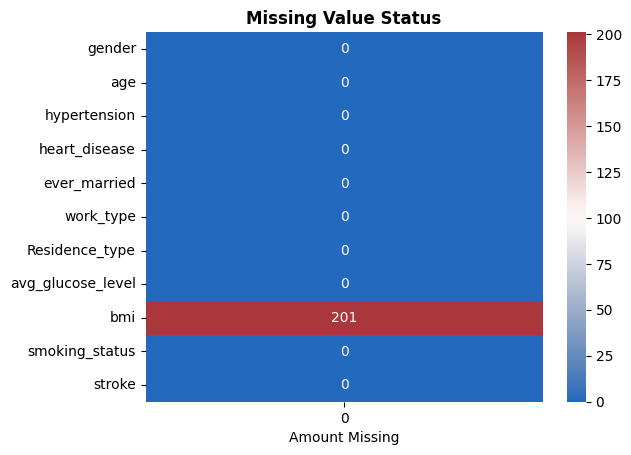

In [10]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [11]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

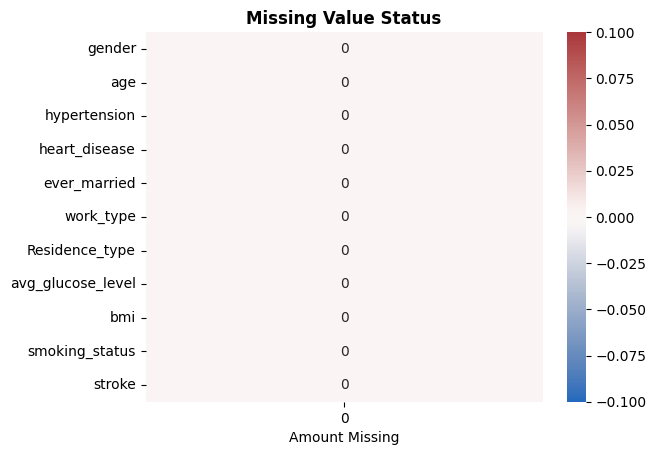

In [12]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [13]:
print('Number of Duplicated Rows :',stroke_data.duplicated().sum())

Number of Duplicated Rows : 0


### Outliers Detection and Removal

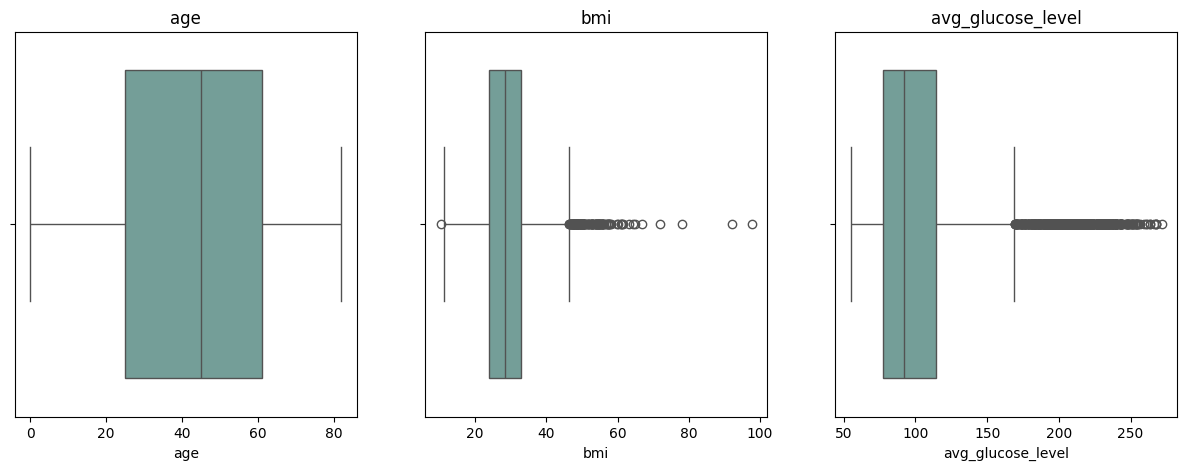

In [14]:
num_cols = ['age','bmi','avg_glucose_level']
plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    sns.boxplot(x=stroke_data[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
en_stroke = stroke_data.apply(le.fit_transform)
en_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [16]:
def count_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    num_outliers = sum((column > upper_limit) | (column < lower_limit))
    return num_outliers

num_cols = en_stroke.select_dtypes(include=['int', 'float']).columns

for col in num_cols:
    num_outliers = count_outliers_iqr(en_stroke[col])
    print(f"Number of outliers in {col}: {num_outliers}")

for col in num_cols:
    q1 = np.percentile(en_stroke[col], 25)
    q3 = np.percentile(en_stroke[col], 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    en_stroke = en_stroke[(en_stroke[col] >= lower_limit) & (en_stroke[col] <= upper_limit)]

print("\nOutliers removed")
for col in num_cols:
    num_outliers = count_outliers_iqr(en_stroke[col])
    print(f"Number of outliers in {col} (after removal): {num_outliers}")

Number of outliers in gender: 0
Number of outliers in age: 0
Number of outliers in hypertension: 498
Number of outliers in heart_disease: 276
Number of outliers in ever_married: 0
Number of outliers in work_type: 657
Number of outliers in Residence_type: 0
Number of outliers in avg_glucose_level: 0
Number of outliers in bmi: 120
Number of outliers in smoking_status: 0
Number of outliers in stroke: 249

Outliers removed
Number of outliers in gender (after removal): 0
Number of outliers in age (after removal): 0
Number of outliers in hypertension (after removal): 0
Number of outliers in heart_disease (after removal): 0
Number of outliers in ever_married (after removal): 0
Number of outliers in work_type (after removal): 0
Number of outliers in Residence_type (after removal): 0
Number of outliers in avg_glucose_level (after removal): 0
Number of outliers in bmi (after removal): 9
Number of outliers in smoking_status (after removal): 0
Number of outliers in stroke (after removal): 0


### Exploratory Data Analysis

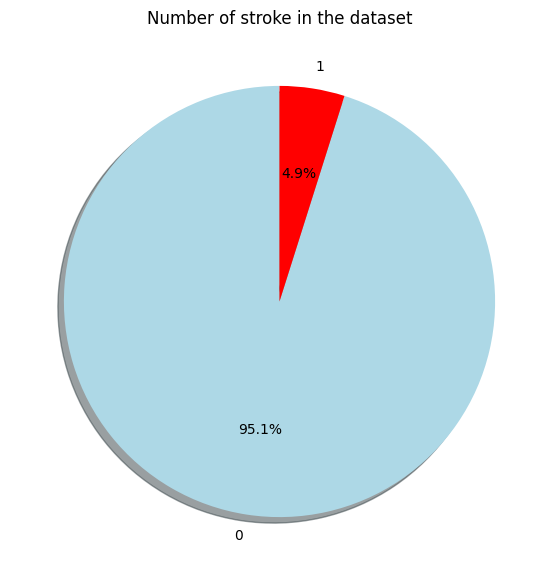

In [17]:
labels =stroke_data['stroke'].value_counts(sort = True).index
sizes = stroke_data['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90 )

plt.title('Number of stroke in the dataset')
plt.show()

We can see from the pie chart that only 5% of people have experienced a stroke!

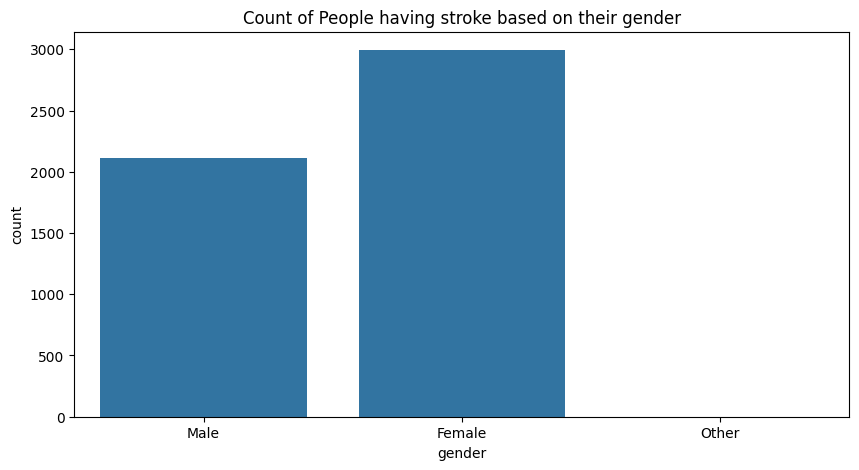

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_data, x='gender')
plt.title('Count of People having stroke based on their gender')
plt.show()

In [19]:
fig = make_subplots( rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>'),
vertical_spacing=0.09, specs=[[{"type": "pie","rowspan": 2},{"type": "histogram"}], [None,{"type": "histogram"}],])

fig.add_trace(go.Pie(values=stroke_data.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],
marker_colors=['pink','lightblue','green'],textposition='inside'), row=1, col=1)

fig.add_trace(go.Histogram(x=stroke_data.query('gender=="Female"').age,marker= dict(color='pink'),name='Female Ages'),row=1, col=2)
fig.add_trace(go.Histogram(x=stroke_data.query('gender=="Male"').age,marker= dict(color='lightblue'),name='Male Ages'),row=2, col=2)

fig.update_layout(height=800,showlegend=True,title_text="<b>Age-Sex Infrence<b>",)
fig.show()

Text(0, 0.5, 'Count')

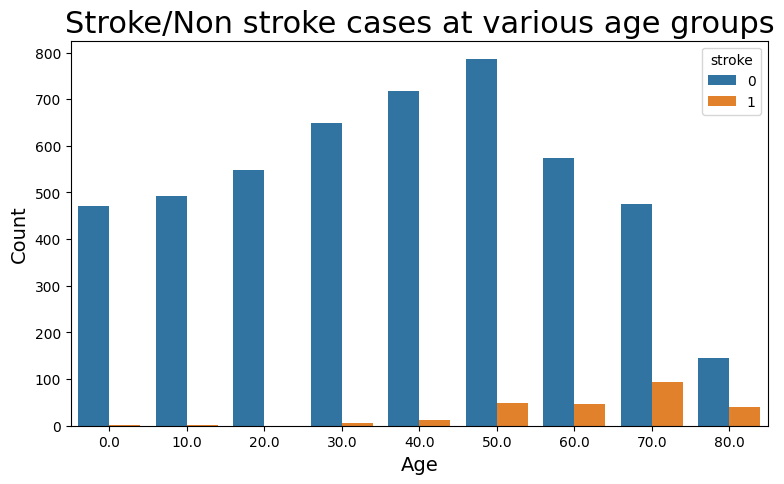

In [20]:
age_bins = np.linspace(0,90,10)
stroke_data['binned_age'] = pd.cut(stroke_data['age'], age_bins, labels=age_bins[:-1],right=False)
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='binned_age',hue='stroke',data=stroke_data)
ax.set_title('Stroke/Non stroke cases at various age groups').set_fontsize(22)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

<Figure size 1700x700 with 0 Axes>

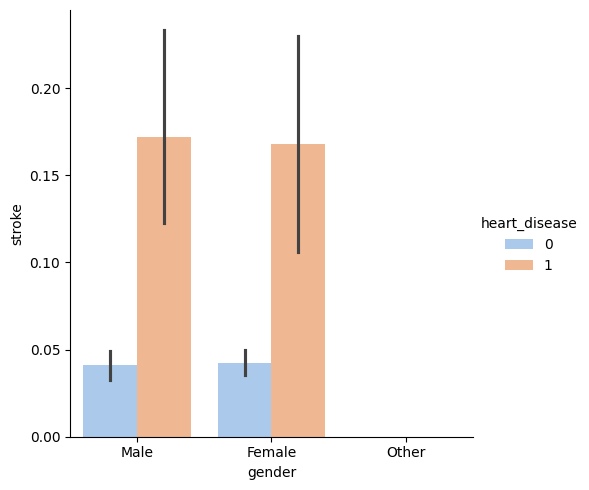

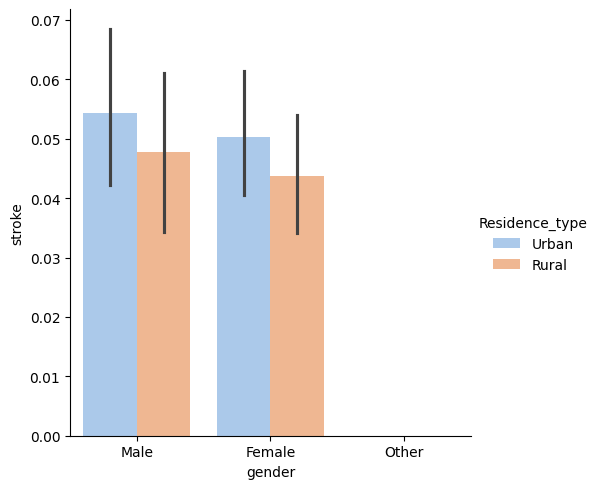

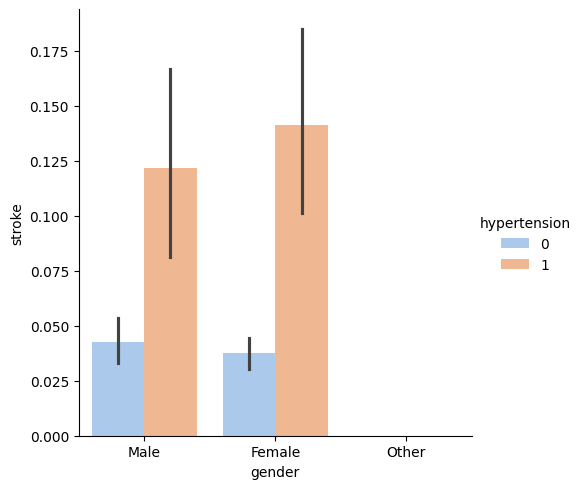

In [21]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=stroke_data)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=stroke_data)
plt.show()

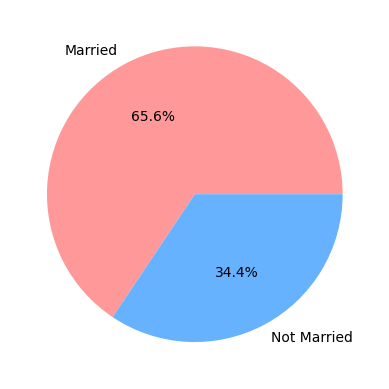

In [22]:
married = dict(stroke_data['ever_married'].value_counts())
fig = plt.pie([married['Yes'],married['No']],labels=['Married','Not Married'],autopct='%1.1f%%',colors=['#FF9999','#66B2FF'])

Text(0.5, 1.0, 'Stroke/Non-Stroke cases based on Work Type')

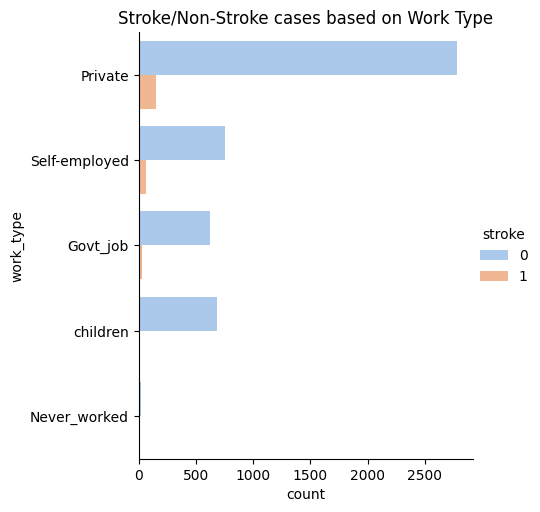

In [23]:
sns.catplot(y="work_type", hue="stroke", kind="count",palette="pastel", data=stroke_data)
plt.title('Stroke/Non-Stroke cases based on Work Type')

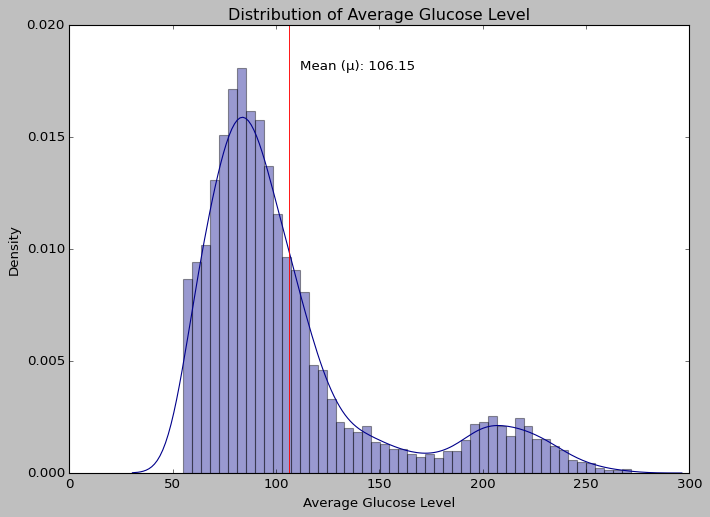

In [24]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(stroke_data['avg_glucose_level'], color='darkblue', kde=True)
plt.axvline(stroke_data['avg_glucose_level'].mean(), color='red', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(stroke_data['avg_glucose_level'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(stroke_data['avg_glucose_level'].mean()))
plt.xlabel("Average Glucose Level")
plt.title(f"Distribution of Average Glucose Level")
plt.show()

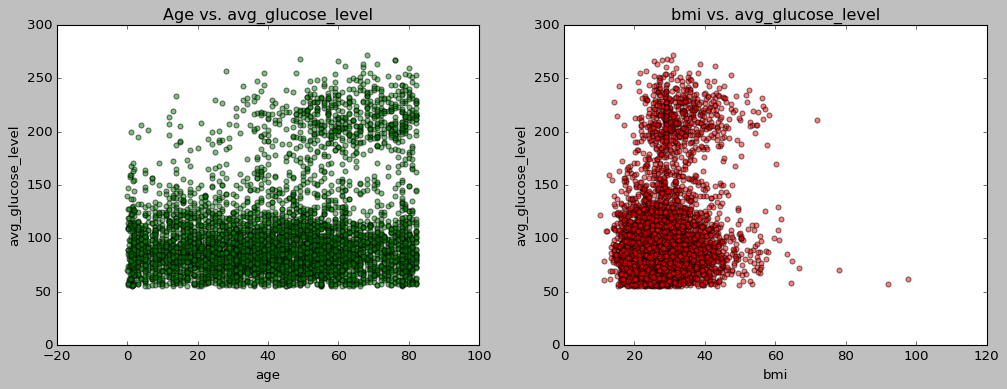

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke_data.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke_data.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

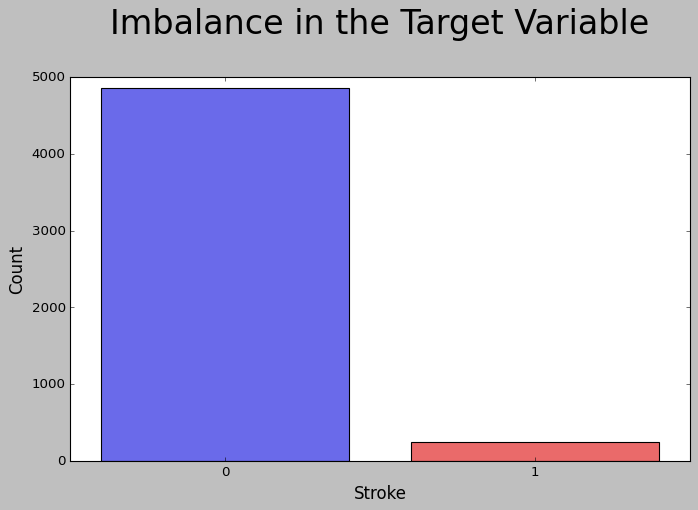

In [26]:
plt.figure(figsize=(10,6))
cp=sns.countplot(x=stroke_data["stroke"],palette="seismic")
plt.title("Imbalance in the Target Variable\n",fontsize=30)
plt.xlabel("Stroke",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [27]:
fig = px.parallel_categories(stroke_data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
      'Residence_type','smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

### Prediction

In [28]:
one_hot=["gender","ever_married","Residence_type","work_type","smoking_status"]
df=pd.get_dummies(stroke_data,columns=one_hot)

In [29]:
df.sample()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,binned_age,gender_Female,gender_Male,gender_Other,...,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2156,55.0,0,0,59.2,43.8,0,50.0,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [30]:
df.shape

(5110, 23)

In [31]:
X=df.drop(["stroke"], axis=1)
y=df["stroke"]

In [32]:
from sklearn.preprocessing import StandardScaler     
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2,random_state=45)

In [34]:
print("x-train: ", X_train.shape)
print("x-test: ",X_test.shape)
print("y-train: ",y_train.shape)
print("y-test: ",y_test.shape)

x-train:  (4088, 22)
x-test:  (1022, 22)
y-train:  (4088,)
y-test:  (1022,)


In [35]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train_resample,y_train_resample=smt.fit_resample(X_train,y_train)
print(X_train_resample.shape ,y_train_resample.shape)

(7770, 22) (7770,)


In [36]:
y_train_resample.value_counts().to_frame()

,count
stroke,
0,3885
1,3885


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(random_state=40, n_jobs=-1, n_estimators=10)
RandomForestClassifier.fit(X_train_resample, y_train_resample)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=40)

In [38]:
from sklearn.metrics import classification_report
print("Random Forest Classifier")
predicted = RandomForestClassifier.predict(X_test)
print (classification_report(y_test, predicted))
print("Accuracy:" , np.mean(predicted == y_test)*100)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       976
           1       0.10      0.07      0.08        46

    accuracy                           0.93      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.92      0.93      0.93      1022

Accuracy: 93.24853228962819


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LogisticRegression =  LogisticRegression()
LogisticRegression.fit(X_train_resample, y_train_resample)

LogisticRegression()

In [40]:
print("Logistic Regression Classifier")

predicted = LogisticRegression.predict(X_test)
print (classification_report(y_test, predicted))
print("Accuracy:" , np.mean(predicted == y_test)*100)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       976
           1       0.12      0.72      0.21        46

    accuracy                           0.75      1022
   macro avg       0.55      0.74      0.53      1022
weighted avg       0.94      0.75      0.82      1022

Accuracy: 75.24461839530333


# Naive Bayes

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train_resample , y_train_resample)

GaussianNB()

In [42]:
print("Naive Bayes Classifier")

predicted = NB_model.predict(X_test)
print (classification_report(y_test, predicted))
print("Accuracy:" , np.mean(predicted == y_test)*100)

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       976
           1       0.06      1.00      0.12        46

    accuracy                           0.32      1022
   macro avg       0.53      0.64      0.28      1022
weighted avg       0.96      0.32      0.43      1022

Accuracy: 31.506849315068493


### SVM

In [43]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_resample , y_train_resample)

SVC()

In [44]:
print("SVM Classifier")
predicted = svm.predict(X_test)
print (classification_report(y_test, predicted))
print("Accuracy:" , np.mean(predicted == y_test)*100)

SVM Classifier
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       976
           1       0.07      0.28      0.12        46

    accuracy                           0.81      1022
   macro avg       0.52      0.56      0.50      1022
weighted avg       0.92      0.81      0.86      1022

Accuracy: 80.82191780821918


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train_resample,y_train_resample)

DecisionTreeClassifier(criterion='entropy')

In [46]:
print("Decision Tree Classifier")
predicted = tree_model.predict(X_test)
print (classification_report(y_test, predicted))
print("Accuracy:" , np.mean(predicted == y_test)*100)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       976
           1       0.13      0.15      0.14        46

    accuracy                           0.91      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.92      0.91      0.92      1022

Accuracy: 91.48727984344423


### Performance Comparison

In [47]:
performance = {'Model': ['Random Forest Classifier', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree' ], 
            'Accuracy': [93.83561643835617, 75.44031311154599, 31.99608610567515 , 81.60469667318982, 89.53033268101761 ] }
performance_df = pd.DataFrame(performance)

In [48]:
fig = px.bar(performance_df, x='Model', y='Accuracy', color='Model', title='Model Performance Comparison',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()